In [4]:
import matplotlib.pyplot as plt
import numpy as np

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

# Simple g-h Filter

In [5]:
weight = 160.  # initial guess
gain_rate = -1.0  # initial guess
time_step = 1.
weight_scale = 4./10
gain_scale = 1./3
estimates = [weight]
predictions = []

for z in weights:
    # prediction step
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
    
    # update step    
    residual = z - weight
    
    gain_rate = gain_rate + gain_scale   * (residual/time_step)
    weight    = weight    + weight_scale * residual
  
    estimates.append(weight)

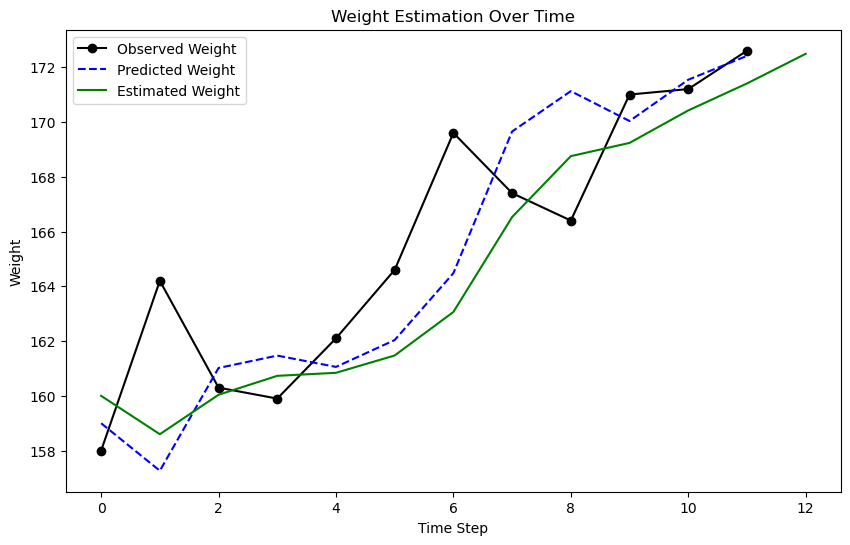

In [6]:
time = list(range(len(weights))) 
time_est = list(range(len(estimates))) 

plt.figure(figsize=(10, 6))
plt.plot(time, weights, 'ko-', label='Observed Weight')
plt.plot(time, predictions, 'b--', label='Predicted Weight')
plt.plot(time_est, estimates, 'g-', label='Estimated Weight')

plt.xlabel('Time Step')
plt.ylabel('Weight')
plt.title('Weight Estimation Over Time')
plt.legend()

plt.show()

# Generic Single State g-h Filter

In [7]:
def gh_filter(data, x0, dx, g, h, dt):
    results = []
    x_est = x0

    for d in data:
        # prediction step
        x_pred = x_est + (dx * dt)
        
        # update step
        residual = d - x_pred
        dx = dx + (h * residual) / dt
        x_est = x_pred + (g * residual)
        results.append(x_est)
    
    return np.array(results)

In [8]:
def gh_filter(data, x0, dx, g, h, dt):
    results = []
    x_est = x0

    for d in data:
        # prediction step
        x_pred = x_est + (dx * dt)
        
        # update step
        residual = d - x_pred
        dx = dx + (h * residual) / dt
        x_est = x_pred + (g * residual)
        results.append(x_est)
    
    return np.array(results)

# Testing on Noisy Data

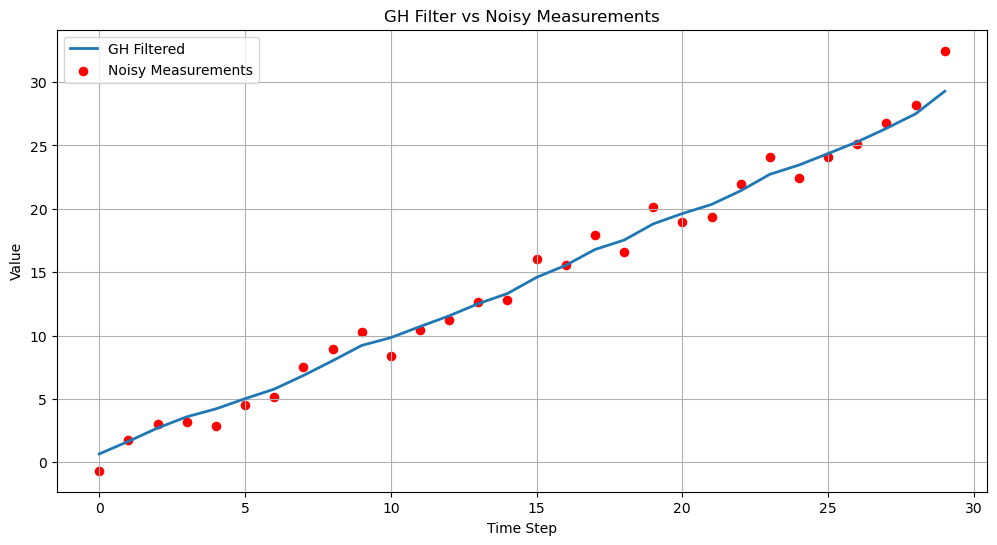

In [ ]:
from numpy.random import randn

def gen_data(x0, dx, count, noise_factor):
    return [x0 + (dx * i) + (randn() * noise_factor) for i in range(count)]

measurements = gen_data(0, 1, 30, 1)

filtered_data = gh_filter(data=measurements, x0=0., dx=1., dt=1., g=0.2, h=0.02)

plt.figure(figsize=(12, 6))
plt.plot(filtered_data, label='GH Filtered', linewidth=2)
plt.scatter(range(len(measurements)), measurements, label='Noisy Measurements', color='red', s=35)
plt.title('GH Filter vs Noisy Measurements')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

### Noisy Data with Bad Conditions

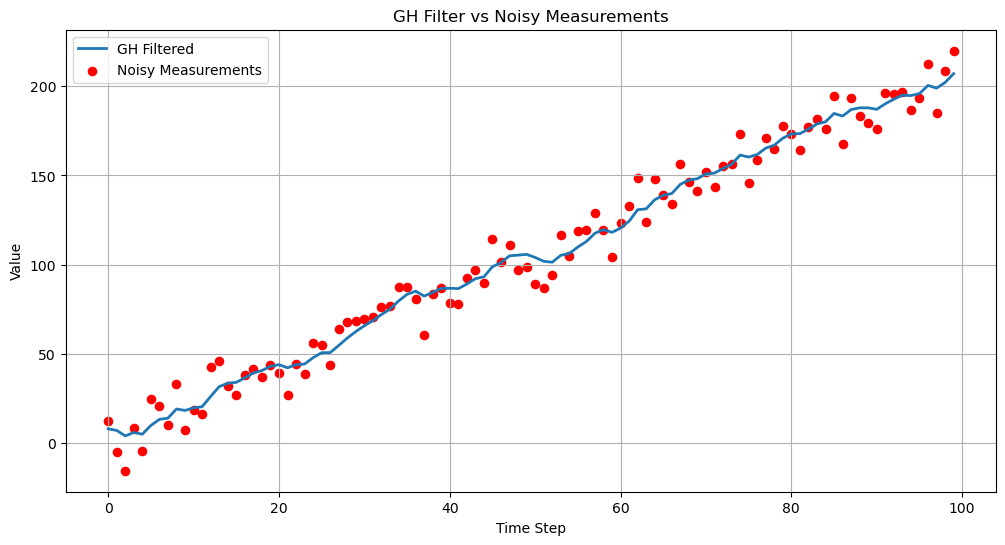

In [ ]:
measurements = gen_data(5., 2., 100, 10)

filtered_data = gh_filter(data=measurements, x0=5., dx=2., dt=1., g=0.2, h=0.02)

plt.figure(figsize=(12, 6))
plt.plot(filtered_data, label='GH Filtered', linewidth=2)
plt.scatter(range(len(measurements)), measurements, label='Noisy Measurements', color='red', s=35)
plt.title('GH Filter vs Noisy Measurements')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

### Extreme Noise

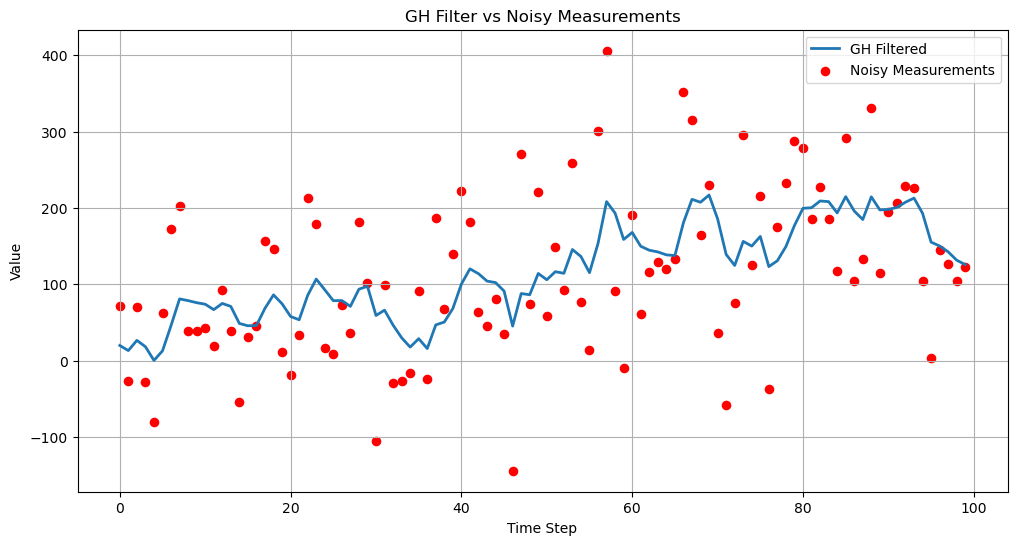

In [ ]:
measurements = gen_data(5., 2., 100, 100)

filtered_data = gh_filter(data=measurements, x0=5., dx=2., dt=1., g=0.2, h=0.02)

plt.figure(figsize=(12, 6))
plt.plot(filtered_data, label='GH Filtered', linewidth=2)
plt.scatter(range(len(measurements)), measurements, label='Noisy Measurements', color='red', s=35)
plt.title('GH Filter vs Noisy Measurements')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()